# 結果

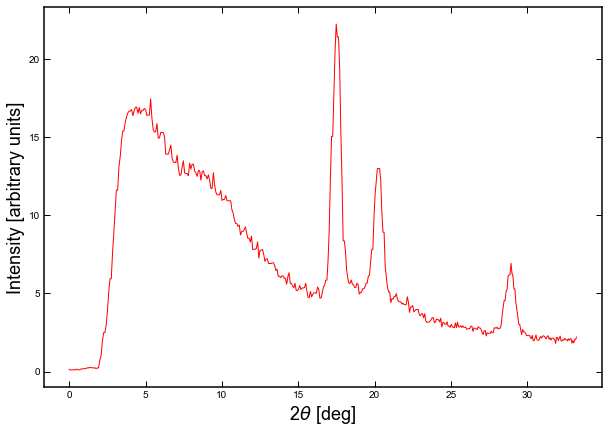

In [5]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

# data_input
df0 = pd.read_csv('0516_Al_01.csv', header= 0)

angle = np.array(df0["Angle"])
intensity = np.array(df0["Intensity"])

# data plot
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(111)

x_mean = 3.14
x_ustd = 2.27

ax1.plot(two_thita_deg, intensity, "r")

ax1.set_xlabel(r"2$\theta$ [deg]", fontsize=18)
ax1.set_ylabel("Intensity [arbitrary units]", fontsize=18)

plt.savefig("Al_plot")
plt.show()

In [13]:
xlay_wavelengh = 0.711
lattice_constant = 4.05

num = ["111","200","220"]
name= ["two_theta", "distance", "value"]

theta =[paramater_optimal[i] for i in range(4,11,3)]
distance =[lattice_constant/sqrt(3), lattice_constant/sqrt(4), lattice_constant/sqrt(8)]
value =[paramater_optimal[i]**2 for i in range(2,11,3)]

df_Al = pd.DataFrame([theta, distance, value], index= name, columns= num)

print(df_Al)

                  111        200        220
two_theta   17.518690  20.242201  28.896402
distance     2.338269   2.025000   1.431891
value      119.543988  41.426174  10.754482


In [8]:
F = [paramater_optimal[i] for i in range(2,11,3)]
I = {'111': F[0]**2, '200': F[1]**2, '220': F[2]**2}

# Al 111 200 220

points = np.arange(-1,1.01,0.01,dtype= np.complex)
dx,dy = np.meshgrid(points,points)

data = []


for dz in points:
    
    p1_r = np.exp(-2*pi*1.j*(dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx-dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy-dz))
    p1 = np.sqrt(I['111']/8)*p1_r
  
    p2_r = np.exp(-4*pi*1.j*dx) + np.exp(4*np.pi*1.j*dx) +\
           np.exp(-4*pi*1.j*dy) + np.exp(4*np.pi*1.j*dy) +\
           np.exp(-4*pi*1.j*dz) + np.exp(4*np.pi*1.j*dz) 
    p2 = np.sqrt(I['200']/6)*p2_r
    
    
    p3_r = np.exp(-4*pi*1.j*(dx+dy))+\
           np.exp(-4*pi*1.j*(dx+dy))+\
           np.exp(-4*pi*1.j*(dx+dz))+\
           np.exp(-4*pi*1.j*(dx-dy))+\
           np.exp(-4*pi*1.j*(dx-dz))+\
           np.exp(-4*pi*1.j*(-dx+dy))+\
           np.exp(-4*pi*1.j*(-dx+dz))+\
           np.exp(-4*pi*1.j*(-dx-dy))+\
           np.exp(-4*pi*1.j*(-dx-dz))+\
           np.exp(-4*pi*1.j*(dy+dz))+\
           np.exp(-4*pi*1.j*(dy-dz))+\
           np.exp(-4*pi*1.j*(-dy+dz))
           
    p3 = np.sqrt(I['220']/12)*p3_r
    

    
    p = p1 + p2 + p3
    
    
    data.append(p)


-1=< z =< 1 : 0


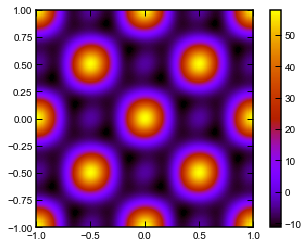

In [11]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot",extent=[-1,1,-1,1])

plt.colorbar()
plt.savefig("Al_im00")

-1=< z =< 1 : 0.5


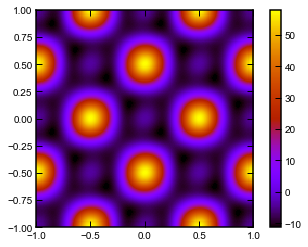

In [12]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot",extent=[-1,1,-1,1])

plt.colorbar()
plt.savefig("Al_im05")

# 完成版 (fitting)

In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

degree is : 8.74490934055268
alpha  is : 0.007294061036619408


NameError: name 'one' is not defined

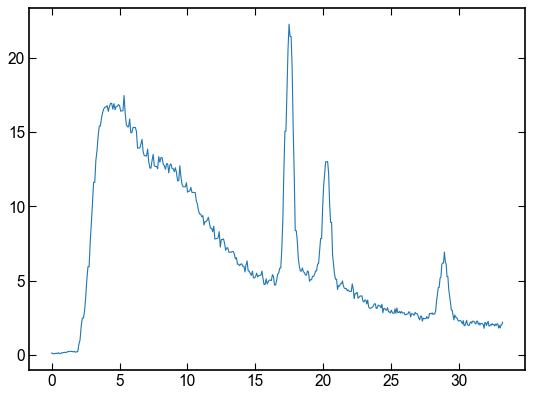

In [2]:

# -*- coding: utf-8 -*-
%matplotlib inline

# import
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import *

# data_input
df0 = pd.read_csv('0516_Al_01.csv', header= 0)

angle = np.array(df0["Angle"])
intensity = np.array(df0["Intensity"])

#[43.2]
distance = 4.05/sqrt(3) #4.05は格子定数,(111)が最大
rad = asin(0.711/(2*distance)) #0.711はX線の波長
deg = degrees(rad)
print("degree is : " + str(deg))

alpha = tan(2*rad)/43.2 #43.2はX線の波長
print("alpha  is : "+ str(alpha))

two_thita_deg = [degrees(atan(alpha*ang)) for ang in angle]


# function_define
def linear(x, a, b):
    return a*np.exp(-b)
    
def gauss(x, a, sigma, mean):
    return a / np.sqrt(2.0*np.pi) / sigma * np.exp(-((x-mean)/sigma)**2/2)

'''
def fitting(x, *paramaters):
    a0, b0, a1, sigma1, mean1, a2, sigma2, mean2, a3, sigma3, mean3, a4, sigma4, mean4, a5, sigma5, mean5, a6, sigma6, mean6  = paramaters
    return linear(x, a0, b0) + \
           gauss(x, a1, sigma1, mean1) + \
           gauss(x, a2, sigma2, mean2) + \
           gauss(x, a3, sigma3, mean3) + \
           gauss(x, a4, sigma4, mean4) + \
           gauss(x, a5, sigma5, mean5) + \
           gauss(x, a6, sigma6, mean6) 
        
# initial
initial_gauss0 = 30., 0.06,
initial_gauss1 = 35., 0.25 , 13. #a1, sigma1, mean1
initial_gauss2 = 23., 0.25 , 19. #a2, sigma2, mean2
initial_gauss3 = 8. , 0.25 , 23. #a3, sigma3, mean3
initial_gauss4 = 5. , 0.2 , 26.
initial_gauss5 = 7. , 0.2 , 29.
initial_gauss6 = 4. , 0.2 , 33.

initial_parameter = initial_gauss0 + initial_gauss1 + initial_gauss2 + initial_gauss3 + \
                    initial_gauss4 + initial_gauss5 + initial_gauss6
# action

one = 90
end= 453

paramater_optimal, covariance = curve_fit(fitting, two_thita_deg[one:], intensity[one:], initial_parameter)
print(paramater_optimal)
'''

#matplotlibの設定
plt.rc('font', family='Arial', size=14) #フォントの設定
plt.rc('xtick.major', width=1, size=6) #x軸の主目盛りの設定
plt.rc('xtick', direction='in', top=True) #x軸目盛りの向き、上側に表示するか
plt.rc('ytick.major', width=1, size=6) #y軸の主目盛りの設定
plt.rc('ytick', direction='in', right=True) #y軸目盛りの向き、右側に表示するか
plt.rc('axes', linewidth=1.5) #枠線の太さ
plt.rc('lines', linewidth=1.0) #プロットの太さ

#今回は、Axes が一つしかないので fig, ax1 = plt.subplots() の方が簡素。
#慣例として ax1 を用いるが、df 同様に意味のある変数名にすべき。
fig = plt.figure(figsize=(8, 6), dpi=80)
gs = gridspec.GridSpec(1, 1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(two_thita_deg, intensity)
ax1.yaxis.set_data_interval(0, 100)

ax1.plot(two_thita_deg[one:], fitting(two_thita_deg[one:], *paramater_optimal))
fig.tight_layout() #グラフ描画前に行うべし。慣例では、fig.tight_layout()
plt.show()


In [ ]:
# function_define
def linear(x, a, b):
    return a* (x + b)
    
def gauss(x, a, sigma, mean):
    return a / np.sqrt(2.0*np.pi) / sigma * np.exp(-((x-mean)/sigma)**2/2)


def fitting(x, *paramaters):
    a0, b0, a1, sigma1, mean1 = paramaters
    return linear(x, a0, b0) + \
           gauss(x, a1, sigma1, mean1) 
        
# initial
initial_gauss0 = -0.42098352, -36.70476744
initial_gauss1 = 16, 0.2, 17
#initial_gauss2 = 7, 0.2, 20
#initial_gauss3 = 4, 0.2, 29

initial_parameter = initial_gauss0 + initial_gauss1
# action

one = 180
end= 250

paramater_optimal, covariance = curve_fit(fitting, two_thita_deg[one:], intensity[one:], initial_parameter)
print(paramater_optimal)


#matplotlibの設定
plt.rc('font', family='Arial', size=14) #フォントの設定
plt.rc('xtick.major', width=1, size=6) #x軸の主目盛りの設定
plt.rc('xtick', direction='in', top=True) #x軸目盛りの向き、上側に表示するか
plt.rc('ytick.major', width=1, size=6) #y軸の主目盛りの設定
plt.rc('ytick', direction='in', right=True) #y軸目盛りの向き、右側に表示するか
plt.rc('axes', linewidth=1.5) #枠線の太さ
plt.rc('lines', linewidth=1.0) #プロットの太さ

#今回は、Axes が一つしかないので fig, ax1 = plt.subplots() の方が簡素。
#慣例として ax1 を用いるが、df 同様に意味のある変数名にすべき。
fig = plt.figure(figsize=(8, 6), dpi=80)
gs = gridspec.GridSpec(1, 1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(two_thita_deg, intensity)
ax1.yaxis.set_data_interval(0, 100)


ax1.plot(two_thita_deg[one:end], fitting(two_thita_deg[one:end], *paramater_optimal))
fig.tight_layout() #グラフ描画前に行うべし。慣例では、fig.tight_layout()
plt.show()




In [7]:
paramater_optimal = [-0.26660302, -39.75769984,
                     10.93361732,   0.26543667,  17.51869,
                     6.43631681,   0.30345599,  20.24220133,
                     3.27940276,   0.32133301,  28.89640213]

print(paramater_optimal)

[-0.26660302, -39.75769984, 10.93361732, 0.26543667, 17.51869, 6.43631681, 0.30345599, 20.24220133, 3.27940276, 0.32133301, 28.89640213]


# 完成版(KCl)

# 積分強度

In [15]:
F = [paramater_optimal[i] for i in range(2,11,3)]
print(F)

[10.93361732, 6.43631681, 3.27940276]


# 完成版(KCl)


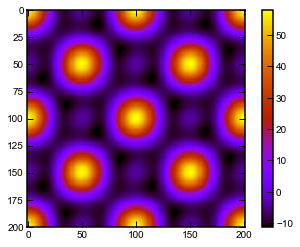

In [14]:
F = [paramater_optimal[i] for i in range(2,11,3)]
I = {'111': F[0]**2, '200': F[1]**2, '220': F[2]**2}

# Al 111 200 220

points = np.arange(-1,1.01,0.01,dtype= np.complex)
dx,dy = np.meshgrid(points,points)

data = []


for dz in points:
    
    p1_r = np.exp(-2*pi*1.j*(dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy+dz)) +\
           np.exp(-2*pi*1.j*(dx-dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx+dy-dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy+dz)) +\
           np.exp(-2*pi*1.j*(-dx-dy-dz))
    p1 = np.sqrt(I['111']/8)*p1_r
  
    p2_r = np.exp(-4*pi*1.j*dx) + np.exp(4*np.pi*1.j*dx) +\
           np.exp(-4*pi*1.j*dy) + np.exp(4*np.pi*1.j*dy) +\
           np.exp(-4*pi*1.j*dz) + np.exp(4*np.pi*1.j*dz) 
    p2 = np.sqrt(I['200']/6)*p2_r
    
    
    p3_r = np.exp(-4*pi*1.j*(dx+dy))+\
           np.exp(-4*pi*1.j*(dx+dy))+\
           np.exp(-4*pi*1.j*(dx+dz))+\
           np.exp(-4*pi*1.j*(dx-dy))+\
           np.exp(-4*pi*1.j*(dx-dz))+\
           np.exp(-4*pi*1.j*(-dx+dy))+\
           np.exp(-4*pi*1.j*(-dx+dz))+\
           np.exp(-4*pi*1.j*(-dx-dy))+\
           np.exp(-4*pi*1.j*(-dx-dz))+\
           np.exp(-4*pi*1.j*(dy+dz))+\
           np.exp(-4*pi*1.j*(dy-dz))+\
           np.exp(-4*pi*1.j*(-dy+dz))
           
    p3 = np.sqrt(I['220']/12)*p3_r
    

    
    p = p1 + p2 + p3
    
    
    data.append(p)

plt.imshow(np.real(data[0]), cmap="gnuplot")
plt.colorbar()


-1=< z =< 1 : 0


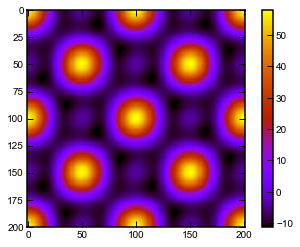

In [70]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot")
plt.colorbar()

-1=< z =< 1 : 0.5


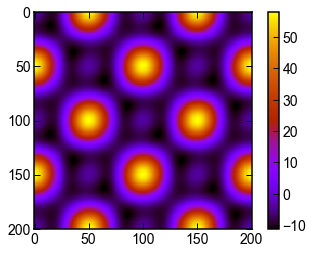

In [11]:
number = int(float(input("-1=< z =< 1 : "))*100+100)
plt.imshow(np.real(data[number]), cmap="gnuplot")
plt.colorbar()

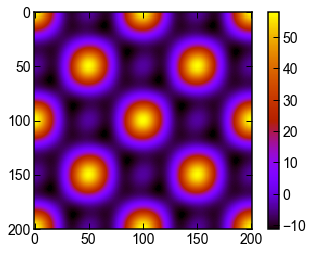

In [12]:
plt.imshow(np.real(p), cmap="gnuplot")
plt.colorbar()

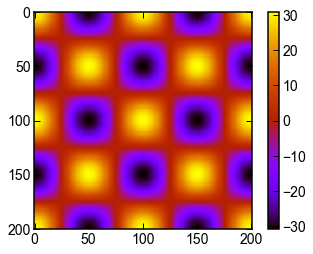

In [15]:
plt.imshow(np.real(p1),cmap="gnuplot")
plt.colorbar()

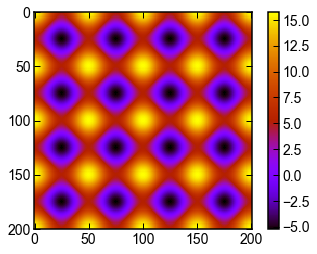

In [16]:
plt.imshow(np.real(p2),cmap="gnuplot")
plt.colorbar()

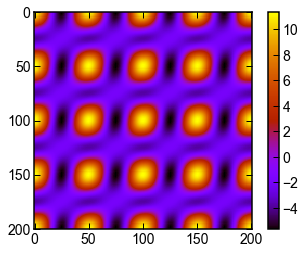

In [17]:
plt.imshow(np.real(p3),cmap="gnuplot")
plt.colorbar()